# Figure 10

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

import sys

sys.path.append('../src')

from Config.config import PATHS

import warnings
warnings.filterwarnings("ignore")

In [16]:
from Utils.interaction import Performer
from Utils.indices import AlternationIndex
from Utils.utils import GetMeasurements, Grid
from Classes.cognitive_model_agents import FocalRegionAgent

In [17]:
fixed_parameters = {
	"num_agents": 2,
	"threshold": 0.5,
}
free_parameters = {
    'inverse_temperature': 6, 
    'len_history': 2, 
    'c': 0.9, 
}
simulation_parameters = {
	'num_rounds': 50,
    'num_episodes': 100,
	'verbose': False
}

In [18]:
df_list = []

# for N in [2, 6]:
#     if N == 2:
#         lengths = [1 ,2]
#     else:
#         lengths = [1, 6]
#     for len_history in lengths:
#         for c in [0.5, 0.7, 0.9]:
for N in [6]:
    if N == 2:
        lengths = [1, 2]
    else:
        lengths = [2]
    for len_history in lengths:
        for c in [0.9]:
            free_parameters['c'] = c
            free_parameters['len_history'] = len_history                
            fixed_parameters['num_agents'] = N
            raw_df = Performer.sim(
                agent_class=FocalRegionAgent,
                fixed_parameters=fixed_parameters,
                free_parameters=free_parameters,
                simulation_parameters=simulation_parameters
            )
            raw_df['threshold'] = fixed_parameters['threshold']
            raw_df['num_agents'] = fixed_parameters['num_agents']
            raw_df['len_history'] = free_parameters['len_history']
            raw_df['c'] = free_parameters['c']
            raw_df['model'] = f"c={c}; len_history={free_parameters['len_history']}; num_players={N}"
            df_list.append(raw_df)

raw_df = pd.concat(df_list, ignore_index=True)


Region 0
------------------------------------------------------------
[[0. 0. 0. 1. 1. 1.]
 [0. 0. 1. 1. 1. 0.]
 [0. 1. 1. 1. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [1. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 1.]]
------------------------------------------------------------



  0%|          | 0/100 [00:00<?, ?it/s]

Text(0.5, 0.98, 'Focal Regions as Attractors')

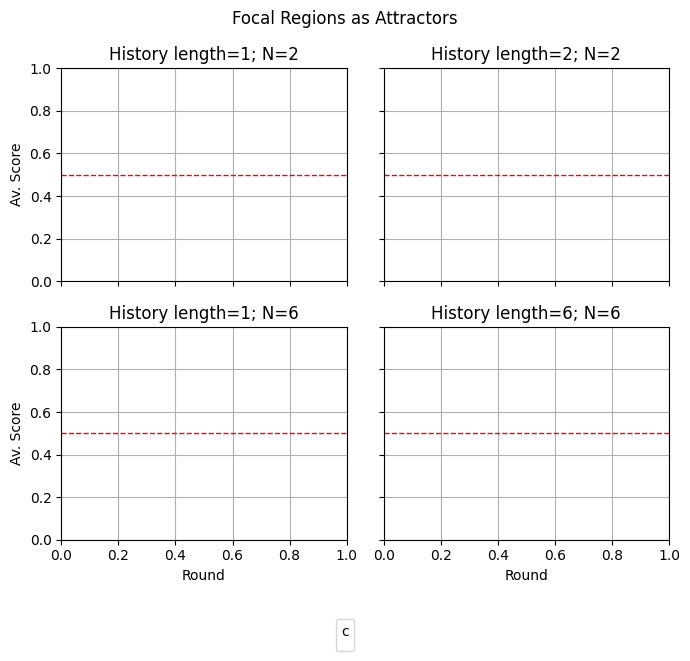

In [19]:
grid = Grid(4)
fig, axes = plt.subplots(
    grid.rows, grid.cols,
    figsize=(grid.cols * 3.5, grid.rows * 3),
    tight_layout=True,
    sharex=True, sharey=True    
)

sns.lineplot(
    x='round', y='score', hue='c',
    data=raw_df[(raw_df['len_history'] == 1) & (raw_df['num_agents'] == 2)], 
    ax=axes[0, 0], palette='colorblind'
)
axes[0, 0].set_title('History length=1; N=2')
axes[0, 0].axhline(y=0.5, color='red', linestyle='--', linewidth=1)

sns.lineplot(
    x='round', y='score', hue='c',
    data=raw_df[(raw_df['len_history'] == 2) & (raw_df['num_agents'] == 2)], 
    ax=axes[0, 1], palette='colorblind'
)
axes[0, 1].set_title('History length=2; N=2')
axes[0, 1].axhline(y=0.5, color='red', linestyle='--', linewidth=1)

sns.lineplot(
    x='round', y='score', hue='c',
    data=raw_df[(raw_df['len_history'] == 1) & (raw_df['num_agents'] == 6)], 
    ax=axes[1, 0], palette='colorblind'
)
axes[1, 0].set_title('History length=1; N=6')
axes[1, 0].axhline(y=0.5, color='red', linestyle='--', linewidth=1)

sns.lineplot(
    x='round', y='score', hue='c',
    data=raw_df[(raw_df['len_history'] == 6) & (raw_df['num_agents'] == 6)], 
    ax=axes[1, 1], palette='colorblind'
)
axes[1, 1].set_title('History length=6; N=6')
axes[1, 1].axhline(y=0.5, color='red', linestyle='--', linewidth=1)

for f, c in grid:
    axes[f, c].set_xlabel('Round')
    axes[f, c].set_ylabel('Av. Score')
    axes[f, c].legend().remove()
    axes[f, c].grid()

handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(
    handles, 
    labels, 
    loc='lower center', 
    ncol=3,
    bbox_to_anchor=(0.5, -.1), 
    title='c'
)


fig.suptitle('Focal Regions as Attractors')


fig.savefig(PATHS['figures_for_paper'] / 'Figure10.png', dpi=300, bbox_inches='tight')

In [20]:
gm = GetMeasurements(raw_df, ['bounded_efficiency', 'inequality'])
idx = AlternationIndex.from_file()
df_measures = gm.get_measurements()
df = idx.alt_precentage(df_measures, columns=['model']).reset_index()
df['c'] = df['model'].apply(lambda x: x.split(';')[0].split('=')[1])
df['len_history'] = df['model'].apply(lambda x: x.split(';')[1].split('=')[1])
df['len_history'] = df['model'].apply(lambda x: x.split(';')[1].split('=')[1])
df['num_players'] = df['model'].apply(lambda x: x.split(';')[2].split('=')[1])
df['alternation_percentage'] = df['alternation_percentage'] * 100
alt_table = pd.pivot_table(
    data=df,
    index=['c'],
    values=['alternation_percentage'],
    columns=['num_players', 'len_history']
).fillna('-')
alt_table

,alternation_percentage
num_players,6
len_history,2
c,
0.9,100.0


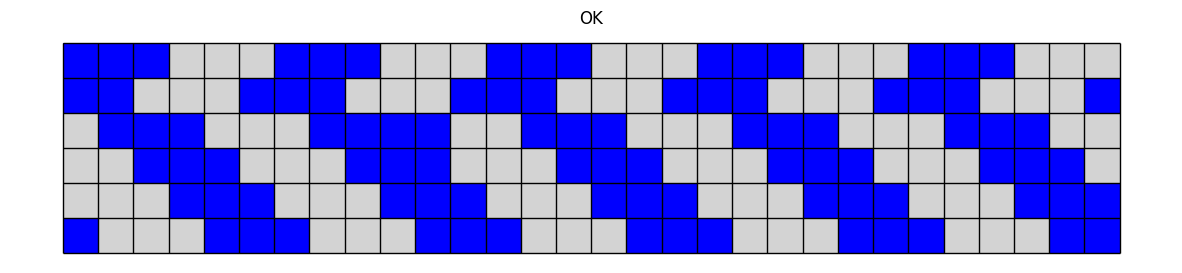

In [22]:
df_aux = df_measures[df_measures['inequality'] < 0.7]
sims = df_aux['id_sim'].unique()
df_aux = raw_df[raw_df['id_sim'] == sims[0]]

from Utils.plot_utils import PlotsAndMeasures, BarRenderer
bar_renderer = BarRenderer(data=df_aux)
bar_renderer.render(
    title=f"OK",
    num_rounds=30
)

In [ ]:
print(alt_table.to_latex())

\begin{tabular}{lr}
\toprule
 & alternation_percentage \\
num_players & 2 \\
len_history & 2 \\
c &  \\
\midrule
0.9 & 23.000000 \\
\bottomrule
\end{tabular}



---